<a href="https://colab.research.google.com/github/debora28/pi-2020.2/blob/main/07_12_Crime_E2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import folium
import pandas as pd

In [ ]:
# Diretamente do GitHub (dataset 2014):
url = 'https://raw.githubusercontent.com/debora28/pi-2020.2/main/2014-1-10mil.csv'
data = pd.read_csv(url)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Diretamente do GitHub(dataset 2016):
# url = 'https://raw.githubusercontent.com/debora28/pi-2020.2/main/Edited_CrimeRatesBrazil.csv'
# data = pd.read_csv(url)

In [ ]:
print(data.isnull().sum())
print(data)

NUM_BO                       0
ANO_BO                       0
ID_DELEGACIA                 0
NOME_DEPARTAMENTO            0
NOME_SECCIONAL               0
DELEGACIA                    0
NOME_DEPARTAMENTO_CIRC       0
NOME_SECCIONAL_CIRC          0
NOME_DELEGACIA_CIRC          0
ANO                          0
MES                          0
DATA_OCORRENCIA_BO          87
HORA_OCORRENCIA_BO        1040
FLAG_STATUS                  0
RUBRICA                      0
DESDOBRAMENTO             9351
CONDUTA                   4835
LATITUDE                  1164
LONGITUDE                 1164
CIDADE                       0
LOGRADOURO                   0
NUMERO_LOGRADOURO           55
FLAG_STATUS.1                0
DESCR_TIPO_PESSOA            0
CONT_PESSOA                  0
SEXO_PESSOA                  0
IDADE_PESSOA              1902
COR                       2372
DESCR_PROFISSAO           2995
DESCR_GRAU_INSTRUCAO      2832
dtype: int64
      NUM_BO  ANO_BO  ...   DESCR_PROFISSAO DESCR_GRAU_IN

In [ ]:
data.shape

(10000, 30)

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   NUM_BO                  10000 non-null  int64  
 1   ANO_BO                  10000 non-null  int64  
 2   ID_DELEGACIA            10000 non-null  int64  
 3   NOME_DEPARTAMENTO       10000 non-null  object 
 4   NOME_SECCIONAL          10000 non-null  object 
 5   DELEGACIA               10000 non-null  object 
 6   NOME_DEPARTAMENTO_CIRC  10000 non-null  object 
 7   NOME_SECCIONAL_CIRC     10000 non-null  object 
 8   NOME_DELEGACIA_CIRC     10000 non-null  object 
 9   ANO                     10000 non-null  int64  
 10  MES                     10000 non-null  int64  
 11  DATA_OCORRENCIA_BO      9913 non-null   object 
 12  HORA_OCORRENCIA_BO      8960 non-null   object 
 13  FLAG_STATUS             10000 non-null  object 
 14  RUBRICA                 10000 non-null 

In [ ]:
data2 = data.drop('DESDOBRAMENTO', axis=1)
data2.to_csv('data_semDesdob.csv', index= False)
data2.head()

,NUM_BO,ANO_BO,ID_DELEGACIA,NOME_DEPARTAMENTO,NOME_SECCIONAL,DELEGACIA,NOME_DEPARTAMENTO_CIRC,NOME_SECCIONAL_CIRC,NOME_DELEGACIA_CIRC,ANO,MES,DATA_OCORRENCIA_BO,HORA_OCORRENCIA_BO,FLAG_STATUS,RUBRICA,CONDUTA,LATITUDE,LONGITUDE,CIDADE,LOGRADOURO,NUMERO_LOGRADOURO,FLAG_STATUS.1,DESCR_TIPO_PESSOA,CONT_PESSOA,SEXO_PESSOA,IDADE_PESSOA,COR,DESCR_PROFISSAO,DESCR_GRAU_INSTRUCAO;;;;;
0,1,2014.0,10363.0,DECAP,DEL.SEC.2 SUL,83 D.P. PARQUE BRISTOL,DECAP,DEL.SEC.2 SUL,83 D.P. PARQUE BRISTOL,2014.0,1.0,02/01/2014,06:30,C,Roubo (art. 157),VEICULO,-23.65760046,-46.61717673,S.PAULO,AV MIGUEL STEFANO,9999,C,Autor,2.0,M,NaN,Preta,NaN,NULL;;;;;
1,1,2014.0,10373.0,DECAP,DEL.SEC.6 SANTO AMARO,100 D.P. JDIM HERCULANO,DECAP,DEL.SEC.6 SANTO AMARO,100 D.P. JDIM HERCULANO,2014.0,1.0,02/01/2014,NaN,C,Roubo (art. 157),TRANSEUNTE,-23.68989209,-46.77386022,S.PAULO,EST DO M BOI MIRIM,5000,C,Vtima,1.0,F,39.0,Branca,NaN,NULL;;;;;
2,1,2014.0,20200.0,DECAP,DEL.SEC.5 LESTE,DEL.SEC.5 LESTE,DECAP,DEL.SEC.1 CENTRO,12 D.P. PARI,2014.0,2.0,22/02/2014,NaN,C,Furto (art. 155),OUTROS,-23.52095371,-46.6253548,S.PAULO,PONTE CRUZEIRO DO SUL,1100,C,Vtima,1.0,M,52.0,Parda,AJUDANTE GERAL,1 Grau completo ;;;;;
3,1,2014.0,30105.0,DEMACRO,DEL.SEC.SANTO ANDR,04 D.P. SANTO ANDR,DEMACRO,DEL.SEC.SANTO ANDR,06 D.P. SANTO ANDR,2014.0,1.0,01/01/2014,01:00,C,Furto (art. 155),VEICULO,-23.69004592,-46.51597554,S.ANDRE,AV AUREA,785,C,Curador,14.0,F,60.0,NaN,APOSENTADO(A),NULL;;;;;
4,1,2014.0,30105.0,DEMACRO,DEL.SEC.SANTO ANDR,04 D.P. SANTO ANDR,DEMACRO,DEL.SEC.SANTO ANDR,06 D.P. SANTO ANDR,2014.0,1.0,01/01/2014,01:00,C,Furto (art. 155),VEICULO,-23.69004592,-46.51597554,S.ANDRE,AV AUREA,785,C,Indiciado,3.0,M,26.0,Parda,DESEMPREGADO(A),2 Grau completo ;;;;;


In [ ]:
data['CONDUTA'].value_counts()

In [ ]:
data['CONDUTA'].fillna('TRANSEUNTE', inplace=True)

In [ ]:
data['CONDUTA'].value_counts()

In [ ]:
data['LATITUDE'].value_counts()

Informacao restrita (art. 31 da LAI)    429
-23.71286115                             48
-23.64027263                             23
-23.52519435                             23
-23.55850851                             22
                                       ... 
-23.48734351                              1
-23.66607602                              1
-23.51927317                              1
-23.65805733                              1
-23.51756481                              1
Name: LATITUDE, Length: 3440, dtype: int64

In [ ]:
data['LATITUDE'].fillna('-23.71286115', inplace=True)

In [ ]:
data['LATITUDE'].replace('Informacao restrita (art. 31 da LAI)', '-23.71286115')

0       -23.65760046
1       -23.68989209
2       -23.52095371
3       -23.69004592
4       -23.69004592
            ...     
9995    -23.59282471
9996    -23.68735677
9997     -23.7704097
9998    -23.58106758
9999     -23.6138048
Name: LATITUDE, Length: 10000, dtype: object

In [ ]:
data['LATITUDE'].replace('NULL', '-23.71286115')

0       -23.65760046
1       -23.68989209
2       -23.52095371
3       -23.69004592
4       -23.69004592
            ...     
9995    -23.59282471
9996    -23.68735677
9997     -23.7704097
9998    -23.58106758
9999     -23.6138048
Name: LATITUDE, Length: 10000, dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   NUM_BO                  10000 non-null  int64  
 1   ANO_BO                  10000 non-null  int64  
 2   ID_DELEGACIA            10000 non-null  int64  
 3   NOME_DEPARTAMENTO       10000 non-null  object 
 4   NOME_SECCIONAL          10000 non-null  object 
 5   DELEGACIA               10000 non-null  object 
 6   NOME_DEPARTAMENTO_CIRC  10000 non-null  object 
 7   NOME_SECCIONAL_CIRC     10000 non-null  object 
 8   NOME_DELEGACIA_CIRC     10000 non-null  object 
 9   ANO                     10000 non-null  int64  
 10  MES                     10000 non-null  int64  
 11  DATA_OCORRENCIA_BO      9913 non-null   object 
 12  HORA_OCORRENCIA_BO      8960 non-null   object 
 13  FLAG_STATUS             10000 non-null  object 
 14  RUBRICA                 10000 non-null 

In [ ]:
data['LONGITUDE'].value_counts()

-46.78186771                            1212
Informacao restrita (art. 31 da LAI)     429
-46.81568811                              23
-46.39605905                              23
-46.61519738                              22
                                        ... 
-46.77626952                               1
-46.64559549                               1
-46.85180754                               1
-46.77055823                               1
-46.88289995                               1
Name: LONGITUDE, Length: 3440, dtype: int64

In [ ]:
data['LONGITUDE'].fillna('-46.78186771', inplace=True)

In [ ]:
data['LONGITUDE'].replace('Informacao restrita (art. 31 da LAI)', '-46.78186771')

0       -46.61717673
1       -46.77386022
2        -46.6253548
3       -46.51597554
4       -46.51597554
            ...     
9995    -46.80662548
9996    -46.66987176
9997    -46.72372479
9998    -46.75421897
9999    -46.53028157
Name: LONGITUDE, Length: 10000, dtype: object

In [ ]:
data['LONGITUDE'].replace('NULL', '-46.78186771')

0       -46.61717673
1       -46.77386022
2        -46.6253548
3       -46.51597554
4       -46.51597554
            ...     
9995    -46.80662548
9996    -46.66987176
9997    -46.72372479
9998    -46.75421897
9999    -46.53028157
Name: LONGITUDE, Length: 10000, dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   NUM_BO                  10000 non-null  int64  
 1   ANO_BO                  10000 non-null  int64  
 2   ID_DELEGACIA            10000 non-null  int64  
 3   NOME_DEPARTAMENTO       10000 non-null  object 
 4   NOME_SECCIONAL          10000 non-null  object 
 5   DELEGACIA               10000 non-null  object 
 6   NOME_DEPARTAMENTO_CIRC  10000 non-null  object 
 7   NOME_SECCIONAL_CIRC     10000 non-null  object 
 8   NOME_DELEGACIA_CIRC     10000 non-null  object 
 9   ANO                     10000 non-null  int64  
 10  MES                     10000 non-null  int64  
 11  DATA_OCORRENCIA_BO      9913 non-null   object 
 12  HORA_OCORRENCIA_BO      8960 non-null   object 
 13  FLAG_STATUS             10000 non-null  object 
 14  RUBRICA                 10000 non-null 

In [ ]:
print(data.isnull().any())
print()

NUM_BO                    False
ANO_BO                    False
ID_DELEGACIA              False
NOME_DEPARTAMENTO         False
NOME_SECCIONAL            False
DELEGACIA                 False
NOME_DEPARTAMENTO_CIRC    False
NOME_SECCIONAL_CIRC       False
NOME_DELEGACIA_CIRC       False
ANO                       False
MES                       False
DATA_OCORRENCIA_BO         True
HORA_OCORRENCIA_BO         True
FLAG_STATUS               False
RUBRICA                   False
DESDOBRAMENTO              True
CONDUTA                    True
LATITUDE                  False
LONGITUDE                 False
CIDADE                    False
LOGRADOURO                False
NUMERO_LOGRADOURO          True
FLAG_STATUS.1             False
DESCR_TIPO_PESSOA         False
CONT_PESSOA               False
SEXO_PESSOA               False
IDADE_PESSOA               True
COR                        True
DESCR_PROFISSAO            True
DESCR_GRAU_INSTRUCAO       True
dtype: bool



In [ ]:
data.describe()

,NUM_BO,ANO_BO,ID_DELEGACIA,ANO,MES,CONT_PESSOA,IDADE_PESSOA
count,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,8098.000000
mean,24.377100,2014.011400,76819.235900,2014.0,1.362000,2.625500,35.008274
std,16.054192,0.112567,110985.447337,0.0,0.898909,1.934276,13.432344
min,1.000000,2014.000000,10004.000000,2014.0,1.000000,1.000000,0.000000
25%,11.000000,2014.000000,10365.000000,2014.0,1.000000,1.000000,25.000000
50%,21.000000,2014.000000,30211.000000,2014.0,1.000000,2.000000,34.000000
75%,37.000000,2014.000000,140206.000000,2014.0,1.000000,3.000000,43.000000
max,63.000000,2017.000000,990900.000000,2014.0,6.000000,17.000000,103.000000


In [ ]:
# data3 = data2.drop('NUM_BO', '')

In [ ]:
data2['MES'].value_counts()

In [ ]:
mes = data2["MES"]
delito = data2["RUBRICA"]


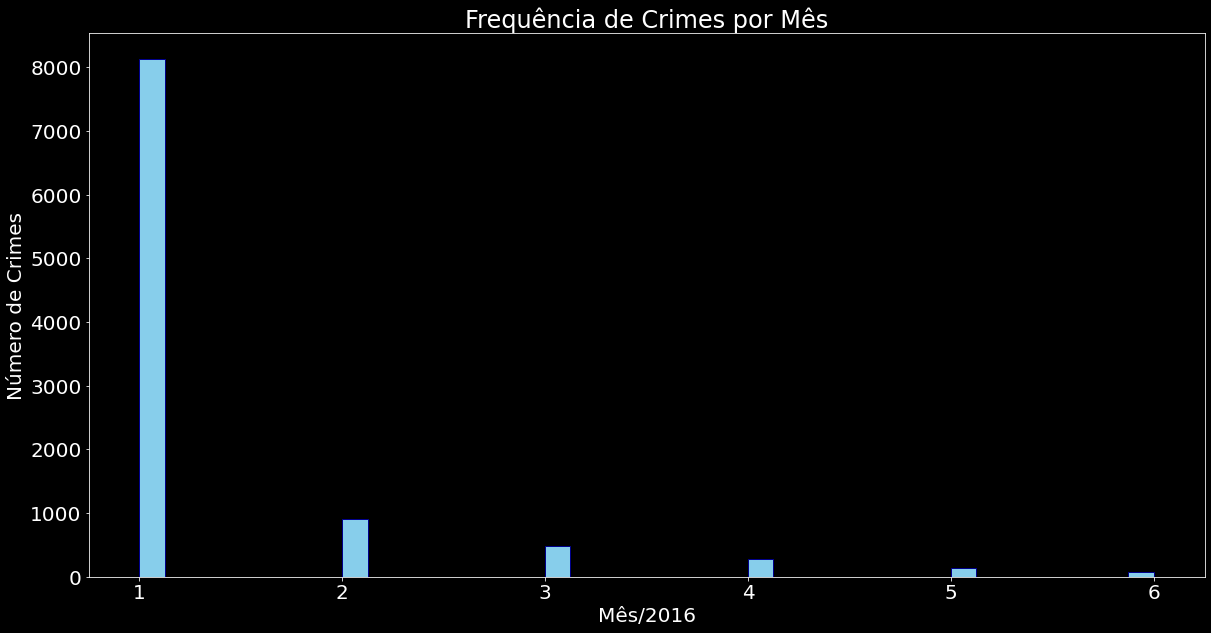

In [ ]:
plt.style.use('dark_background')
plt.figure(figsize=(20,10))
plt.hist(mes, bins=40, color = "skyblue", ec="darkblue")
plt.title('Frequência de Crimes por Mês')
plt.ylabel('Número de Crimes')
plt.xlabel('Mês/2016')
plt.rcParams.update({'font.size': 20})
plt.show()

In [ ]:
data2['RUBRICA'].value_counts()

Roubo (art. 157)                                                     3494
Lesao corporal (art. 129)                                            1310
Drogas sem autorizacao ou em desacordo (Art.33 caput)                1175
Furto (art. 155)                                                     1003
Furto qualificado (art. 155 4o.)                                      607
Lesao corporal culposa na direcao de veiculo automotor (Art. 303)     596
A.I.-Drogas sem autorizacao ou em desacordo (Art.33 caput)            519
Lesao corporal (art 129_9)                                            477
Homicidio simples (art. 121)                                          271
A.I.-Roubo (art. 157)                                                 136
Estupro de vulneravel (art.217-A)                                      98
Homicidio qualificado (art. 121 2o.)                                   96
Estupro (art.213)                                                      50
Lesao corporal culposa (art. 129. 6o.)

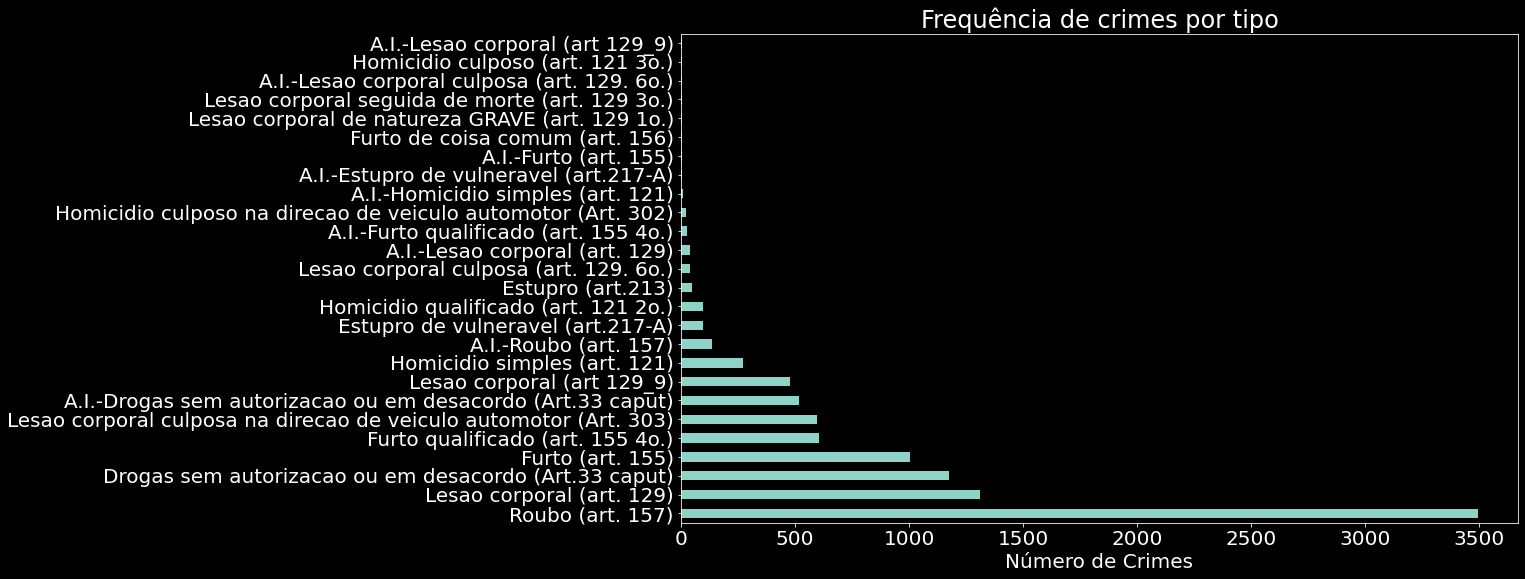

In [ ]:
plt.style.use('dark_background')
plt.figure(figsize=(15,9))
plt.xlabel('Número de Crimes')
data['RUBRICA'].value_counts().plot(kind='barh', title='Frequência de crimes por tipo')
plt.show()


In [ ]:
# novas_colunas = pd.get_dummies(data2['RUBRICA']) 
# data3 = pd.concat([data2,novas_colunas], axis=1) 
# data3.head(2)

In [ ]:
!pip install git+https://github.com/python-visualization/folium

  Cloning https://github.com/python-visualization/folium to /tmp/pip-req-build-cjbq2316
  Running command git clone -q https://github.com/python-visualization/folium /tmp/pip-req-build-cjbq2316
  Created wheel for folium: filename=folium-0.0.0-py2.py3-none-any.whl size=94062 sha256=42791d7f85e6d1e7306c55f138debc537d6e71bf2163ddb66c75b21e7d965615
  Stored in directory: /tmp/pip-ephem-wheel-cache-11o84u7p/wheels/1e/e1/75/ecbc91fd5dd5d90befb0b533bf7492d38acffa033310731862
Successfully built folium


In [ ]:
print(folium.__version__)

unknown


In [ ]:
from folium import plugins
coordenadas = []
lat = data['LATITUDE'][:1000].values
long = data['LONGITUDE'][:1000].values

mapa = folium.Map(location=[-23.71286115, -46.78186771],tiles='Stamen Toner',zoom_start=12)

for la,lo in zip(lat,long):
    coordenadas.append([la,lo])

mapa.add_child(plugins.HeatMap(coordenadas))


ValueError: ignored

In [ ]:
mapa